
# Polynomial interpolation


This example demonstrates how to approximate a function with a polynomial of
degree n_degree by using ridge regression. Concretely, from n_samples 1d
points, it suffices to build the Vandermonde matrix, which is n_samples x
n_degree+1 and has the following form:

[[1, x_1, x_1 ** 2, x_1 ** 3, ...],
 [1, x_2, x_2 ** 2, x_2 ** 3, ...],
 ...]

Intuitively, this matrix can be interpreted as a matrix of pseudo features (the
points raised to some power). The matrix is akin to (but different from) the
matrix induced by a polynomial kernel.

This example shows that you can do non-linear regression with a linear model,
using a pipeline to add non-linear features. Kernel methods extend this idea
and can induce very high (even infinite) dimensional feature spaces.


In [1]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

colors = ['teal', 'yellowgreen', 'gold']

plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower left')
plt.show()

Automatically created module for IPython interactive environment


<Figure size 640x480 with 1 Axes>

### Fit polinómico teórico

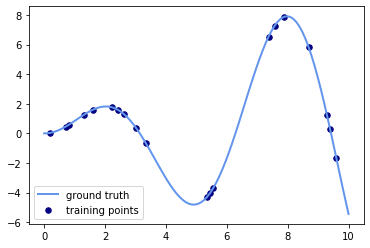

In [2]:
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.legend(loc='lower left')
plt.show()

### Varios ajustes polinómicos mediante polynomialFeatures; utilizamos 'PolynomialFeatures' de scikit

source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [3]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X_ex = np.arange(6).reshape(3, 2)
X_ex

array([[0, 1],
       [2, 3],
       [4, 5]])

##### For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]

In [4]:
poly = PolynomialFeatures(2)
poly.fit_transform(X_ex)


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [5]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X_ex)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

#### Lo aplicamos al dataset generado arriba, source: https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html

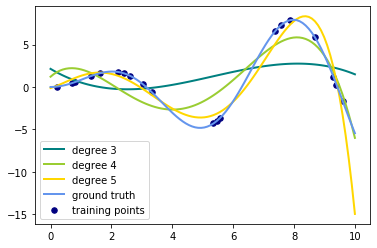

In [6]:
for count, degree in enumerate([3, 4, 5]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.legend(loc='lower left')

plt.show()

#### Entrenamos los modelos lineales sobre el dataset polinómico generado con PolynomialFeatures

In [7]:
X_plot[:5]  #dataset original unidimensional

array([[0.       ],
       [0.1010101],
       [0.2020202],
       [0.3030303],
       [0.4040404]])

In [8]:
poly = PolynomialFeatures(2)
poly_transf_X_plot = poly.fit_transform(X_plot)
poly_transf_X_plot[:5]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304],
       [1.        , 0.2020202 , 0.04081216],
       [1.        , 0.3030303 , 0.09182736],
       [1.        , 0.4040404 , 0.16324865]])

In [9]:
len(poly_transf_X_plot)

100

In [10]:
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)

f(poly_transf_X_plot[:5])

array([[8.41470985e-01, 0.00000000e+00, 0.00000000e+00],
       [8.41470985e-01, 1.01856990e-02, 1.04100229e-04],
       [8.41470985e-01, 4.05351225e-02, 1.66517022e-03],
       [8.41470985e-01, 9.04284256e-02, 8.42041936e-03],
       [8.41470985e-01, 1.58843076e-01, 2.65319072e-02]])

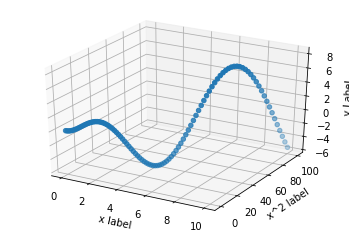

In [11]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(poly_transf_X_plot[:, 1], poly_transf_X_plot[:, 2], f(X_plot)) #, marker=m)

ax.set_xlabel('x label')
ax.set_ylabel('x^2 label')
ax.set_zlabel('y Label')

plt.show()

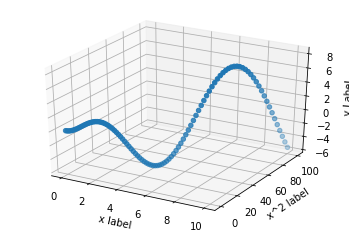

In [12]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(poly_transf_X_plot[:, 1], poly_transf_X_plot[:, 2], f(poly_transf_X_plot)[:, 1]) #, marker=m)

ax.set_xlabel('x label')
ax.set_ylabel('x^2 label')
ax.set_zlabel('y Label')

plt.show()

In [13]:
from sklearn.linear_model import Ridge, LinearRegression

reg = Ridge().fit(poly_transf_X_plot, f(X_plot))
reg.predict(poly_transf_X_plot)
reg.score(poly_transf_X_plot, f(X_plot))

0.11354756219300811

In [14]:
reg = LinearRegression().fit(poly_transf_X_plot, f(X_plot))
reg.predict(poly_transf_X_plot)
reg.score(poly_transf_X_plot, f(X_plot))

0.1135539804682314

In [15]:
degree=3
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
model.score(X, y)

0.14933391503278381

In [16]:
degree=4
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
model.score(X, y)

0.6689287869659692

In [17]:
degree=5
model = make_pipeline(PolynomialFeatures(degree), Ridge())
model.fit(X, y)
model.score(X, y)

0.9301832507438357

### Pruebo sobre datos con forma de parábola para que el ajuste de grado 2 sea claro

In [178]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def f(x):
    """ function to approximate by polynomial interpolation"""
    return np.square(x)

# generate points used to plot
x_plot = np.linspace(-30, 30, 100)

# generate points and keep a subset of them
x = np.linspace(-30, 30, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y_true = f(x)
y_true

array([828.74196511, 663.45270891, 632.59871442, 489.34802571,
       412.21303949, 277.77777778, 238.84297521, 202.8466483 ,
       139.66942149, 100.        ,   4.49954086,   7.43801653,
        11.11111111, 202.8466483 , 238.84297521, 298.34710744,
       489.34802571, 663.45270891, 695.04132231, 760.42240588])

In [179]:
y_true = [y + np.random.randint(-30, 30, 1) for y in y_true]
y_true = np.array(y_true).reshape(len(y_true), )

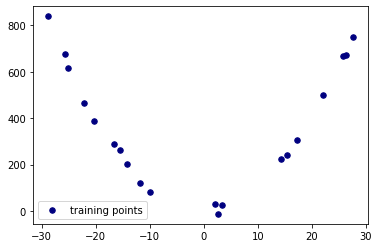

In [180]:
plt.scatter(x, y_true, color='navy', s=30, marker='o', label="training points")
plt.legend(loc='lower left')
plt.show()

### Known ground truth values

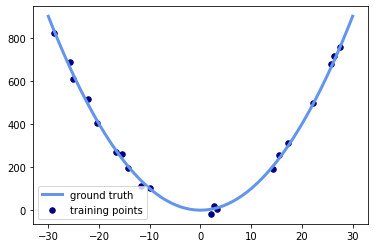

In [146]:
plt.scatter(x, y_true, color='navy', s=30, marker='o', label="training points")
lw = 3
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw, label="ground truth")
plt.legend(loc='lower left')
plt.show()

In [147]:
import plotly.express as px
import pandas as pd

data_frame = pd.DataFrame({'x': x_plot, 'y': f(x_plot)}) 
fig = px.scatter(data_frame, x="x", y="y")
fig.show()

### Generate new attribute for the new higher dimensional feature space

source: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures

In [148]:
# New input values with additional feature
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly_transf_X = poly.fit_transform(X)
poly_transf_X[:5]

array([[  1.        , -28.78787879, 828.74196511],
       [  1.        , -25.75757576, 663.45270891],
       [  1.        , -25.15151515, 632.59871442],
       [  1.        , -22.12121212, 489.34802571],
       [  1.        , -20.3030303 , 412.21303949]])

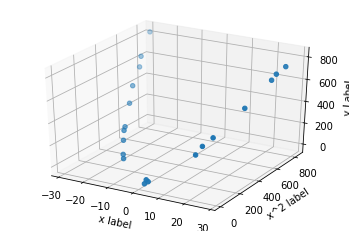

In [149]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(poly_transf_X[:, 1], poly_transf_X[:, 2], y_true) #f(poly_transf_X)[:, 2]) #, marker=m)

ax.set_xlabel('x label')
ax.set_ylabel('x^2 label')
ax.set_zlabel('y Label')

plt.show()

In [181]:
import plotly.express as px

data_frame_poly_trans = pd.DataFrame({'x': poly_transf_X[:, 1], 'y': poly_transf_X[:, 2], 'z': y_true})
fig = px.scatter_3d(data_frame_poly_trans, x='x', y='y', z='z')
fig.show()


In [153]:

fig = px.scatter(data_frame_poly_trans, x="x", y="z")
fig.show()

In [154]:
fig = px.scatter(data_frame_poly_trans, x="y", y="z")
fig.show()

Linear regression modelling over the new features extended dataset

In [182]:
from sklearn.linear_model import Ridge, LinearRegression

reg = LinearRegression().fit(poly_transf_X, y_true)
reg.predict(poly_transf_X)
score = reg.score(poly_transf_X, y_true)
print('score: ', score)
print('regression coefficients: ', reg.coef_)

score:  0.9958814287044724
regression coefficients:  [0.         0.08463643 0.98732327]


Model weights

In [159]:
reg.coef_

array([0.        , 0.17613363, 1.01433928])

In [169]:
data_frame_poly_y_true = pd.DataFrame({'x': poly_transf_X[:, 1], 'x_2': poly_transf_X[:, 2], 'y': y_true, 'label': 'ground_truth'})
data_frame_poly_preds = pd.DataFrame({'x': poly_transf_X[:, 1], 'x_2': poly_transf_X[:, 2], 'y': reg.predict(poly_transf_X), 'label': 'prediction'})


In [172]:
fig = px.scatter(data_frame_poly_preds, x="x", y="y")
fig.show()

In [173]:
fig = px.scatter(data_frame_poly_preds, x="x_2", y="y")
fig.show()

#### Las preds cuadran tanto respecto a la escala lineal (donde tenemos una parábola) como respecto a la cuadrática (donde es lineal)

In [175]:
data_frame_poly_groundTruth_y_preds = pd.concat([data_frame_poly_y_true, data_frame_poly_preds])


In [176]:
fig = px.scatter_3d(data_frame_poly_groundTruth_y_preds, x='x', y='x_2', z='y', color='label', hover_data=['label', 'y'], hover_name='label') #, hover_name=['label', 'y'])

fig.show()